# Assignment 5

In [93]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 

Let us assume that your measurement data consists of 𝑛 = 20 observations, the average of which is $\bar{x}$= 30 and variance $s^2$ = 20; this is sufficient statistics for the data. A judicious assumption is that measured values are normally distributed. The posterior distribution for the mean $\mu$ and precision $\tau(=\frac{1}{\sigma^2})$ was found to be of the form

$$
\pi(\mu, \tau \mid x) \propto \tau^{\frac{n}{2}} 
\exp\Bigg[ 
- \frac{\tau}{2} \Big( (n-1)s^2 + n (\bar{x} - \mu)^2 \Big) 
\Bigg]
$$

(Lecture 5, p. 14.)

In the book (Wilkinson, SMSB), the full conditionals for the parameters of the normal
distribution are “derived” (in fact, given) (Lecture 5, p. 17):

$$
\tau \mid \mu, x \sim \text{Gamma}\left(a + \frac{n}{2},\; b + \frac{1}{2} \left[ (n-1)s^2 + n (\bar{x} - \mu)^2 \right] \right)
$$

$$
\mu \mid \tau, x \sim \mathcal{N} \left( \frac{c d + n \tau \bar{x}}{n \tau + d}, \; \frac{1}{n \tau + d} \right)
$$


Implement the Gibbs sampler algorithm and use it to plot the joint distribution for 𝜇 and 𝜏 = 1/$\sigma^2$ and the marginal distributions for 𝜇 and 𝜏. Choose parameter values 𝑎 = 𝑏 = 1, 𝑐 = 3, 𝑑 = 1/100. As initial values (called prior means, often used as the starting point for sampling) for mean and precision use 𝜇 = 𝑎/𝑐 and 𝜏 = 𝑐. Do 100 000 iterations (= samples). 

In [94]:
n = 20
x_bar = 30
var = 20

In [95]:
# Prior parameter values 
a = 1
b = 1
c = 3
d = 1/100

In [96]:
N_iterations = 10000

# initial values 
mu_current = a/c
tau_current = c

mu_samples = np.zeros(N_iterations)
tau_samples = np.zeros(N_iterations)


# gibbs sampling 
for i in range(N_iterations):
    
    alpha_post = a + n/2
    beta_post = b + ((n-1)*var + n*(x_bar - mu_current)**2)/2
    
    # tau|mu
    tau_current = np.random.gamma(shape=alpha_post, scale=1.0/beta_post) 
    
    mean_post = (c*d + n*tau_current*x_bar)/(n*tau_current + d)
    var_post = 1/(n*tau_current + d)
    std_post = np.sqrt(var_post)
    
    # mu|tau
    mu_current = np.random.normal(loc=mean_post, scale=std_post)
    
    mu_samples[i] = mu_current
    tau_samples[i] = tau_current
    
    

Plot (i) marginal values of 𝝁 vs iteration steps,

Text(0.5, 1.0, 'Marginal values of $\\mu$ vs iteration steps')

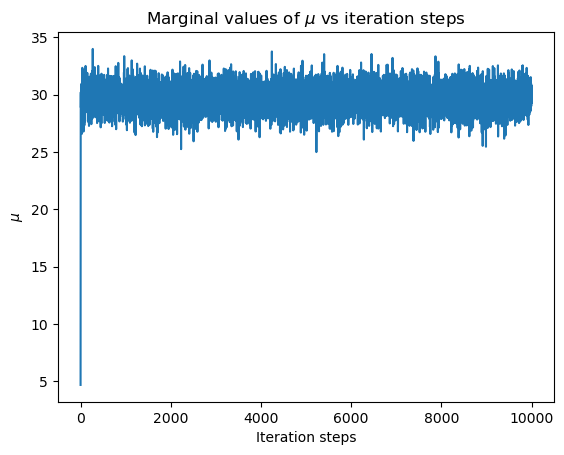

In [97]:
plt.plot(range(N_iterations), mu_samples)
plt.xlabel('Iteration steps')
plt.ylabel('$\mu$')
plt.title('Marginal values of $\mu$ vs iteration steps')

 (ii) marginal distribution for 𝝁,

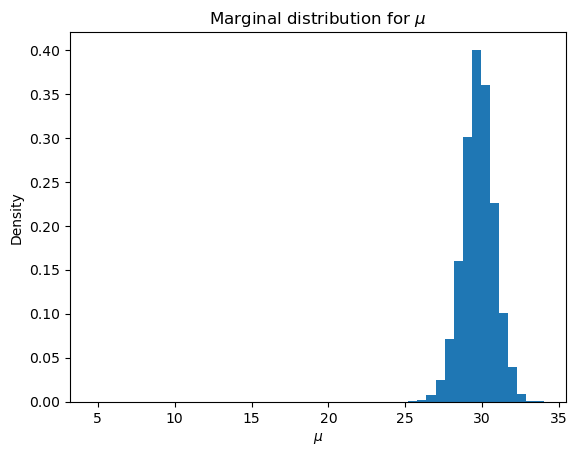

In [98]:
plt.hist(mu_samples, bins=50, density=True)
plt.xlabel('$\mu$')
plt.ylabel('Density')
plt.title('Marginal distribution for $\mu$')
plt.show()

(iii) marginal values of 𝝉 vs iteration steps,

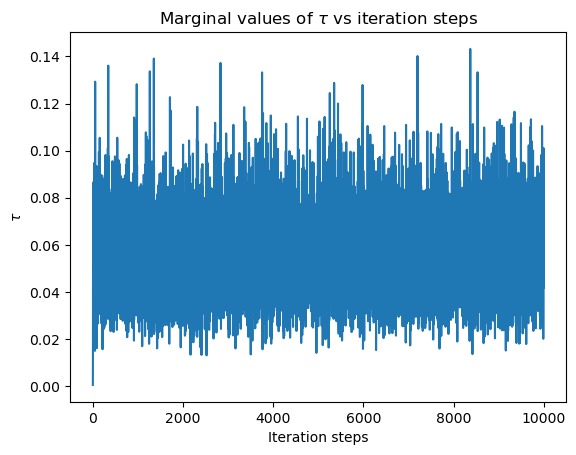

In [99]:
plt.plot(range(N_iterations), tau_samples)
plt.xlabel('Iteration steps')
plt.ylabel('$\\tau$')
plt.title('Marginal values of $\\tau$ vs iteration steps')
plt.show()

(iv) marginal distribution for $\tau$

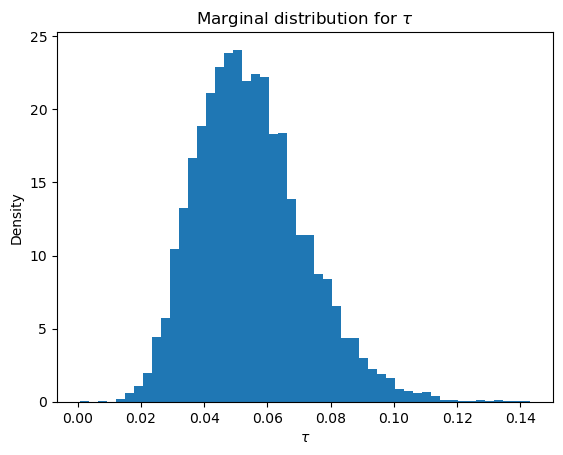

In [100]:
plt.hist(tau_samples, bins=50, density=True)
plt.xlabel('$\\tau$')
plt.ylabel('Density')
plt.title('Marginal distribution for $\\tau$')
plt.show()

(v) the joint posterior distribution for $\mu$ and $\tau$.

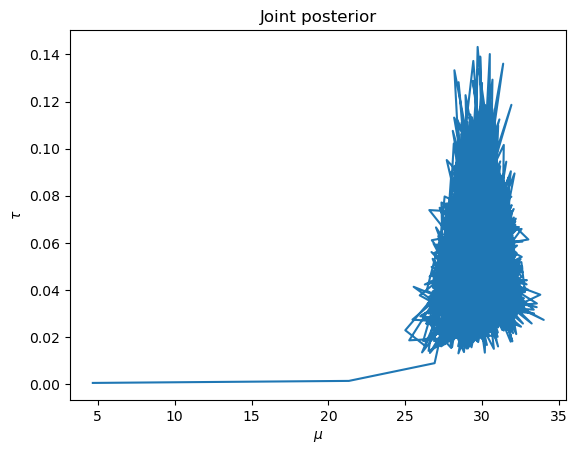

In [101]:
plt.plot(mu_samples,tau_samples)
plt.xlabel('$\mu$')
plt.ylabel('$\\tau$')
plt.title('Joint posterior')
plt.show()

Compute and print the mean values for (vi) $\mu$ and (vii) $𝝉$.

In [102]:
mu_mean = np.mean(mu_samples)
tau_mean = np.mean(tau_samples)
print(f'(vi) Mean value of $\mu$ is {mu_mean:.3f}')
print(f'(vii) Mean value of $\\tau$ is {tau_mean:.3f}')

(vi) Mean value of $\mu$ is 29.709
(vii) Mean value of $\tau$ is 0.055


Each task (i) – (vii) is of equal weight in peer grading. 

(In other words, produce results similar (but not identical) to those in the SMSB book: Fig. 10.4 (3rd edition, the pdf of the book).) This should be reasonably straightforward a task with the hint given below, so in order for it to be useful for you, please refer to Lecture 5, especially page 18, and make sure you understand how your algorithm relates to the described Gibbs sampling procedure and the used notation. (No need to report anything about this last part.) 

**Hint**: This would be something to write an algorithm for without any model, but it would be unfair if some found it and others did not. So, take a peek at the function implemented in R in Figure 10.2 in Wilkinson. 

**Note**: There is a ‘burn-in’ period before convergence is reached, the corresponding values should be discarded before analysis takes place. In general, one should also check the burn- in time. Here, the burn-in time is negligible, so it should not affect your results. You can easily check for this by discarding different numbers of initial steps and see if this has any effect. As said, in this case it should not. (No need to report anything about this part.) 

**Note for those using random.normal**: Please note that, unlike in the standard notation used by the book, where the normal distribution is defined as 𝑁(mean, variance), python’s random.normal is defined as random.normal(mean, standard deviation), so take care of using correct parameter values in order for you to belong to the lucky FF group having identical plots. 

**Note for those using random.gamma**: (The same sort of note as for random.normal.) As all the assignments, this one also uses the book’s and lecture notes’ notation 𝐺𝑎(𝛼, 𝛽). If you are using python’s random.gamma, then take note that this function is defined as 𝐺𝑎(𝑘, 𝜃), where 𝑘 = 𝛼 and 𝜃 = 1/𝛽. (You can either write the gamma function without using library routines. That’s short and easy, but you are also allowed to use the library gamma here.)